In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [5]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


(0, 791942.9442210911)

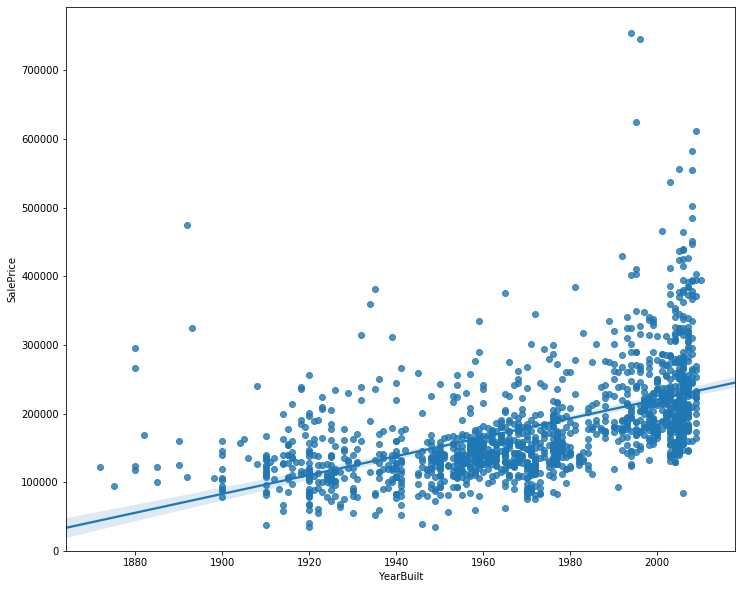

In [6]:
#GUT CHECK
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x="YearBuilt", y="SalePrice", data=df_train)
plt.ylim(0,)

In [7]:
## Find & drop columns with missing data

In [8]:
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [9]:
## Show columns that have more than 1 missing data value
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [10]:
#drop all the columns that have more than 1 missing value

df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)

In [11]:
#check to to see there are no more missing vals
df_train.isnull().sum().max()

1

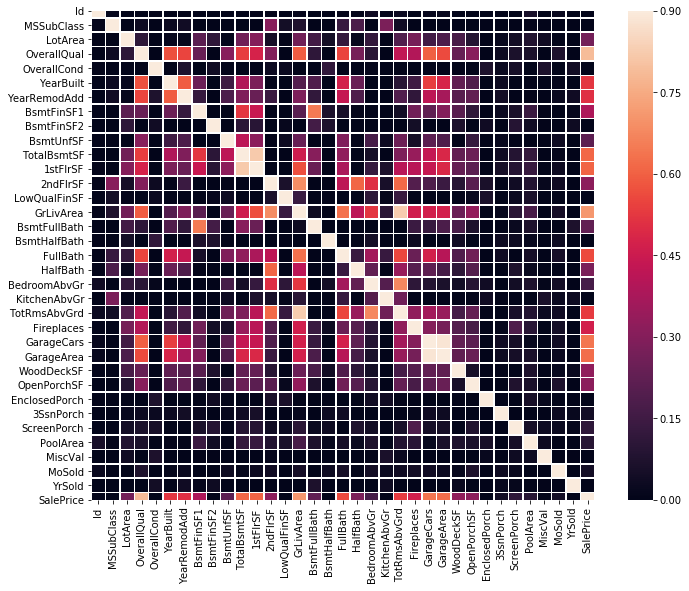

In [12]:
#correlation matrix
correlation_matrix = df_train.corr()

#plot heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(correlation_matrix, vmin=0, vmax=.9, square=True, linewidths=0.5,);

In [13]:
# Focusing only on variables with correlation coef larger than 0.5
df_correlation = correlation_matrix[['SalePrice']].sort_values(by=['SalePrice'], ascending=False)
df_corr_filtered = df_correlation[df_correlation['SalePrice'] > 0.5]
df_corr_filtered

,SalePrice
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
GarageArea,0.623431
TotalBsmtSF,0.613581
1stFlrSF,0.605852
FullBath,0.560664
TotRmsAbvGrd,0.533723
YearBuilt,0.522897


In [51]:
# Simple Linear Regression 
from sklearn.linear_model import LinearRegression

In [52]:
#Linear regression object
lr = LinearRegression()
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
X = df_train[['OverallQual']]
Y = df_train['SalePrice']
lr.fit(X,Y)
print(f"The coef of the linear regression model is {lr.coef_}")
print(f"The intercept of the linear regression model is {lr.intercept_}")
print(f'y = {lr.intercept_} + b({lr.coef_})')

The coef of the linear regression model is [45435.8025931]
The intercept of the linear regression model is -96206.07951476038
y = -96206.07951476038 + b([45435.8025931])


(0, 797275.0329858123)

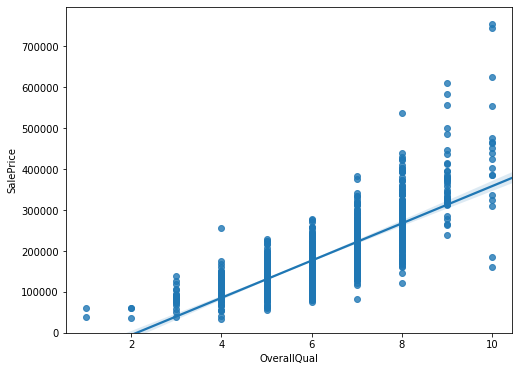

In [54]:
#Visualize
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="OverallQual", y="SalePrice", data=df_train)
plt.ylim(0,)

In [55]:
#find R^2 value for the above regression 
print('The R-square is: ', lr.score(X, Y))

#Very poor predictor

The R-square is:  0.625651892462118


# Multiple Linear Regression
## What if we want to use more than 1 variable to predict SalePrice


In [38]:
#Create DF with top 5 correlated values
Z = df_train[['OverallQual', 'GrLivArea','GarageCars', 'GarageArea', 'TotalBsmtSF']]

Y = df_train['SalePrice']

#Create Linear Regression Object
lr = LinearRegression()

#Fit the model
lr.fit(Z, Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
print(f"The coef of the linear regression model is {lr.coef_}")
print(f"The intercept of the linear regression model is {lr.intercept_}")
print(f'y = {lr.intercept_} + b({lr.coef_})')

The coef of the linear regression model is [2.36350074e+04 4.53458230e+01 1.45443154e+04 1.71333928e+01
 3.15014753e+01]
The intercept of the linear regression model is -99072.05038623846
y = -99072.05038623846 + b([2.36350074e+04 4.53458230e+01 1.45443154e+04 1.71333928e+01
 3.15014753e+01])


In [42]:
#Make a prediction using the MLR model
yhat = lr.predict(Z)
yhat

array([209357.35184277, 176689.27612497, 215847.73238313, ...,
       227633.85736227, 120600.7039854 , 134896.32523381])

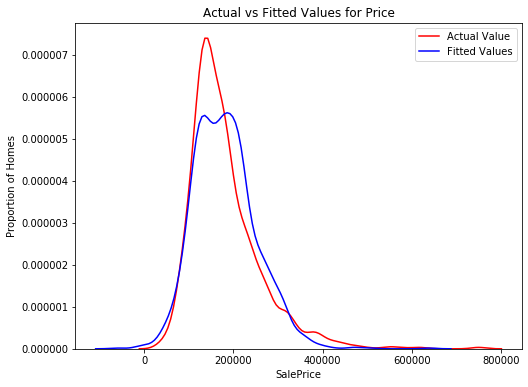

In [153]:
## PLOT

plt.figure(figsize=(width, height))


ax1 = sns.distplot(df_train['SalePrice'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('SalePrice')
plt.ylabel('Proportion of Homes')

plt.show()
plt.close()

In [44]:
# What is the R^2 value of the MLR above model

print('The R-square is: ', lr.score(Z, Y))

# A lot better than the Single Linear Regression

The R-square is:  0.7611083041001819


# Polynomial Regression

In [ ]:
# We noticed above that Linear Regression didn't fit the model very well

In [121]:
#create function to plot polynomial regression

def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(0, 6000)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit Home SalePrice')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('House SalePrice')

    plt.show()
    plt.close()

In [122]:
#Define Vars
x = df_train['GrLivArea']
y = df_train['SalePrice']

In [150]:
# Here we use a polynomial of the 6th order
f = np.polyfit(x, y, 6)
p = np.poly1d(f)
print(p)

           6             5             4             3          2
6.742e-16 x - 1.325e-11 x + 9.429e-08 x - 0.0003152 x + 0.5296 x - 317.6 x + 1.444e+05


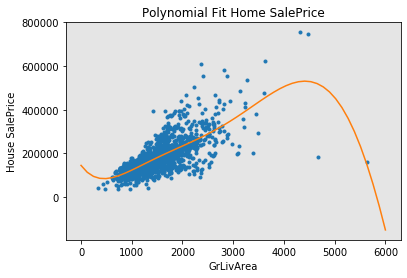

In [151]:
PlotPolly(p, x, y, 'GrLivArea')

In [152]:
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.5298352932776758
